# ME 7160 Project


### Solution to Duffing Equation with Forcing Term:

#### Following duffing equation solved.

**$\ddot{x} + \dot{x} + x + x^3 = cos(2t)sin(5t)$**

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 50 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t = t[0:-1]


x0=np.ones(N-1)
#x0=np.cos(2*t)

f = np.cos(2*t)*np.sin(5*t)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + xdot + x + x**3 - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'Newton-CG', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Numerical solution for comparison
from scipy.integrate import odeint

def deriv(x, t):
    return np.array([x[1], -0.25*x[1] - x[0] - x[0]**3 + np.cos(2*t)*np.sin(5*t)])

time = np.linspace(0.0, 100, 2000)
xinit=np.array([0,0])
x = odeint(deriv, xinit, time)

#Plot of numerical and analytical solutions
fig = plt.figure()
plt.plot((22.022*np.pi)+t, sol.x, 'bo') #FFT solution plot
plt.plot(time, x[:, 0], 'r--') #analytical steady state solution to the above posed problem
fig.suptitle('Plot of FFT and numerical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([69, 75, -0.25, 0.25])
plt.grid()
plt.show()

ValueError: Jacobian is required for Newton-CG method

### Results from the optimization above can be used to approximate a fitted function that can be used as desired. Assume the following solution:

### $x(t) = A_o + A_1cos(\omega t + \beta) + A_2cos(2\omega t + 2\beta) + A_3cos(3\omega t + 3\beta)$

#### Here coefficients $A_o$, $A_1$, $A_2$, $A_3$, $\omega$, $\beta$ are the unknowns and will be solved for using least square fitting

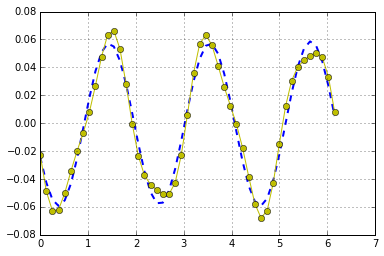

Coefficient values listed below
[ -5.64499475e-04   8.51975455e-05   8.06054828e-04   5.83751594e-02
   9.93102424e-01   6.64727501e-01]


In [68]:
#Define function to be called in the "leastsq" function
def errorFun(p, t):
    A0, A1, A2, A3, omega, beta = p
    err = sol.x - (A0 + A1*np.cos(omega*t + beta) + A2*np.cos(2*omega*t + 2*beta) + A3*np.cos(3*omega*t + 3*beta))
    return err

#Initial guess for coefficients
p0 = [1, 1, 1, 1, 1, 1]
#print(np.array(p0))

#Least square calculation
from scipy.optimize import leastsq
plsq = leastsq(errorFun, p0, args=(t))

#Function used for plotting purposes
def peval(t, p):
    return p[0] + p[1]*np.cos(p[4]*t + p[5]) + p[2]*np.cos(2*p[4]*t + 2*p[5]) + p[3]*np.cos(3*p[4]*t + 3*p[5])

#Plot numerical and least square results
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(t, peval(t, plsq[0]), 'b--', linewidth = 2)
plt.plot(t, sol.x, 'y-o')

plt.grid()
plt.show()

coeff = plsq[0]

#Plot calculated results the coefficients
print('Coefficient values listed below')
print(plsq[0])

### Fitted equation not matching the peaks of the response but not a bad fit overall.

In [70]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

time=sp.Symbol('t', real = True)

A0=sp.nsimplify(round(coeff[0], 3))
A1=sp.nsimplify(round(coeff[1], 3))
A2=sp.nsimplify(round(coeff[2], 3))
A3=sp.nsimplify(round(coeff[3], 3))
omega=sp.nsimplify(round(coeff[4], 3))
beta=sp.nsimplify(round(coeff[5], 3))

ans = A0 + A1*sp.cos(omega*time + beta) + A2*sp.cos(2*omega*time + 2*beta) + A3*sp.cos(3*omega*time + 3*beta)
ans

   ⎛993⋅t   133⎞         ⎛2979⋅t   399⎞       
cos⎜───── + ───⎟   29⋅cos⎜────── + ───⎟       
   ⎝ 500    100⎠         ⎝ 1000    200⎠    1  
──────────────── + ──────────────────── - ────
      1000                 500            1000